In [86]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df_train = pd.read_csv('./data/train_df.csv')
df_test = pd.read_csv('./data/test_df.csv')

In [2]:
display(df_train.head())

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


## Class 별 Directory 생성

In [17]:
classList = df_train['class'].unique()
classList

array(['transistor', 'capsule', 'wood', 'bottle', 'screw', 'cable',
       'carpet', 'hazelnut', 'pill', 'metal_nut', 'zipper', 'leather',
       'toothbrush', 'tile', 'grid'], dtype=object)

In [37]:
original_dataset_dir = './data/train'

base_dir = './data/class_test'
os.mkdir(base_dir)

for c_name in classList:
    class_dir = os.path.join(base_dir,c_name).replace('\\','/')
    os.mkdir(class_dir)
    
    class_df = df_train[df_train['class']==c_name]
    for idx, c_row in class_df.iterrows() :
        src = os.path.join(original_dataset_dir, c_row.file_name).replace('\\','/')
        dst = os.path.join(class_dir, c_row.file_name).replace('\\','/')
        shutil.copyfile(src,dst)

In [46]:
df_train[df_train['class']=='transistor']

array(['transistor-good', 'transistor-bent_lead',
       'transistor-damaged_case', 'transistor-misplaced',
       'transistor-cut_lead'], dtype=object)

- 회전, 이동, 상하반전, 좌우반전
- 상하좌우 늘리기 있는지 확인


<난이도 하>

- transistor
    - 기판 정렬 일정,
        - 이동, 좌우반전
        - 상하반전을 하면 안된다.

        
<난이도 중>        
                
- capsule
    - 캡슐 정렬 일정
        - 이동, 회전(약간)
- bottle
    - 모양 일정
        - 이동(약간), 회전, 좌우반전, 상하반전
- cable
    - 케이블 내 전선의 배치가 일정함
        - 이동, 회전(약간)
    - 케이블 단면의 빛 비침 정도를 어떻게 해야할지 생각
- hazelnut
    - 깨짐, 상처 등
        - 이동, 회전, 좌우반전, 상하반전
- leather
    - 찍힘, 긁힘 등
        - 이동, 회전, 상하반전, 좌우반전
- toothbrush
    - 색상다름, 칫솔날림 등
        - 이동, 좌우반전
- grid
    - 이물질 등
        - 이동, 회전, 좌우반전, 상하반전
        
        
<난이도 상>

- wood
    - 나무옹이, 구멍, 스크래치, 이염 등
        - 이동, 회전, 좌우반전, 상하반전
    - 나무옹이도 이상치에 해당하는지 확인 필요
- screw
    - 찍힘, 긁힘 등의 미세한 차이가 있음
        - 이동, 회전, 좌우반전, 상하반전
- carpet
    - 찢김 정도.. 눈으로도 잘안보임
        - 이동, 회전, 좌우반전, 상하반전
- pill
    - 크기, 모양, 정렬 일정
        - 이동, 회전(약간)
    - 이염 등 눈으로 확인 불가
- metal_nut
    - 찍힘, 반대로 되어있는것
        - 반대로 되어있는거 state인지 확인 필요
        - 이동, 회전, 상하좌우반전...?    
- zipper
    - 위치 일정
        - 이동, 좌우반전
    - 눈으로 확인이 어려움
- tile
    - 눈으로 확인어려움
        - 이동, 회전, 좌우반전, 상하반전


## Class별 state 특징 보기

In [3]:
classList = df_train['class'].unique()
classList

array(['transistor', 'capsule', 'wood', 'bottle', 'screw', 'cable',
       'carpet', 'hazelnut', 'pill', 'metal_nut', 'zipper', 'leather',
       'toothbrush', 'tile', 'grid'], dtype=object)

In [21]:
base_dir = './data/class_test'

# figure = plt.figure()
# ax = []

# for i in range(10):
#     ax.append(figure.add_subplot(2,5,i+1))

for c_name in classList:
    class_df = df_train[df_train['class']==c_name]
    state_list = class_df['state'].unique()
    print(c_name, ':' , len(state_list), ',',state_list)  # 2~ 9개의 state
#     for s_name in state_list: 
#         s_file_name = class_df[class_df['state']=='s_name'].reset_index()['file_name'][0]
#         src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
#         image = Image.open(s_file_name)

transistor : 5 , ['good' 'bent_lead' 'damaged_case' 'misplaced' 'cut_lead']
capsule : 6 , ['good' 'squeeze' 'crack' 'poke' 'faulty_imprint' 'scratch']
wood : 6 , ['good' 'combined' 'scratch' 'color' 'hole' 'liquid']
bottle : 4 , ['good' 'contamination' 'broken_large' 'broken_small']
screw : 6 , ['good' 'thread_side' 'manipulated_front' 'thread_top' 'scratch_neck'
 'scratch_head']
cable : 9 , ['bent_wire' 'good' 'missing_cable' 'cut_outer_insulation'
 'cut_inner_insulation' 'missing_wire' 'combined' 'cable_swap'
 'poke_insulation']
carpet : 6 , ['hole' 'good' 'metal_contamination' 'thread' 'color' 'cut']
hazelnut : 5 , ['good' 'crack' 'cut' 'hole' 'print']
pill : 8 , ['pill_type' 'good' 'scratch' 'crack' 'color' 'contamination'
 'faulty_imprint' 'combined']
metal_nut : 5 , ['scratch' 'good' 'flip' 'color' 'bent']
zipper : 8 , ['fabric_border' 'good' 'split_teeth' 'rough' 'fabric_interior'
 'squeezed_teeth' 'combined' 'broken_teeth']
leather : 6 , ['good' 'fold' 'cut' 'glue' 'poke' 'colo

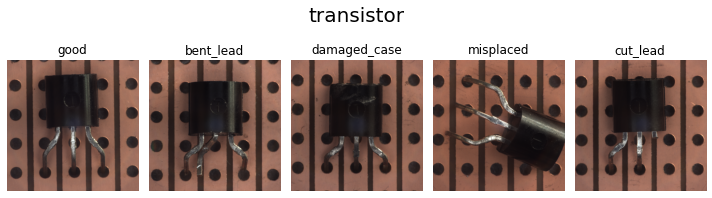

In [49]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,3))
ax = []
idx = 0

for i in range(5):
    ax.append(figure.add_subplot(1,5,i+1) )

c_name = 'transistor'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

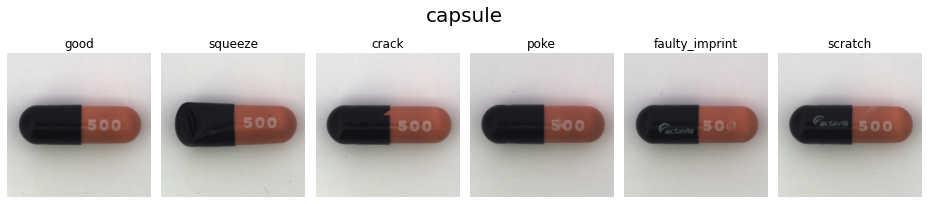

In [52]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'capsule'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

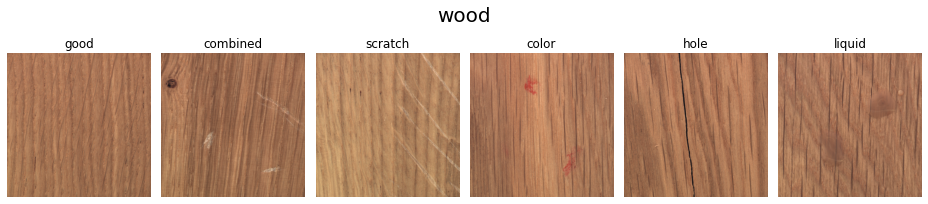

In [53]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'wood'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

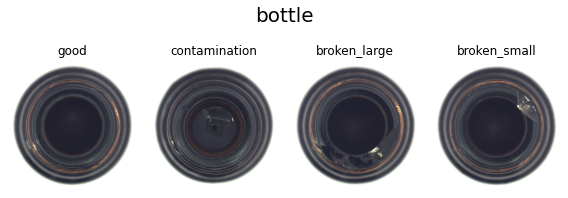

In [58]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(8,3))
ax = []
idx = 0

for i in range(4):
    ax.append(figure.add_subplot(1,4,i+1) )

c_name = 'bottle'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

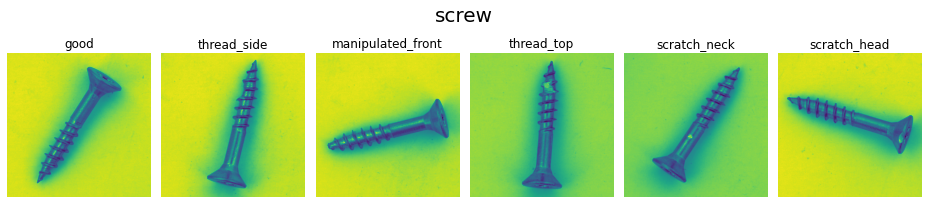

In [76]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'screw'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image, aspect='equal')
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

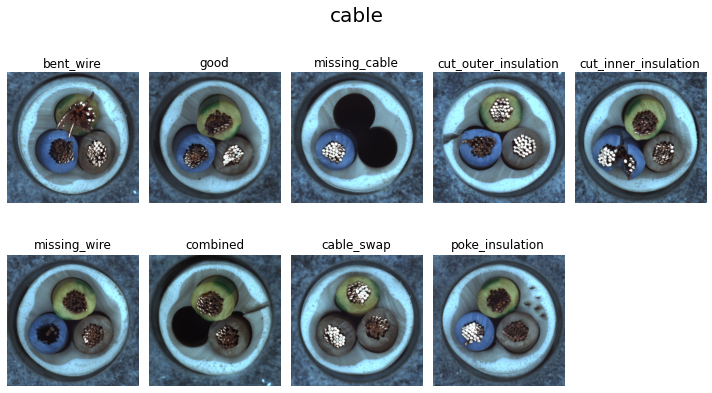

In [64]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,6))
ax = []
idx = 0

for i in range(9):
    ax.append(figure.add_subplot(2,5,i+1) )

c_name = 'cable'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

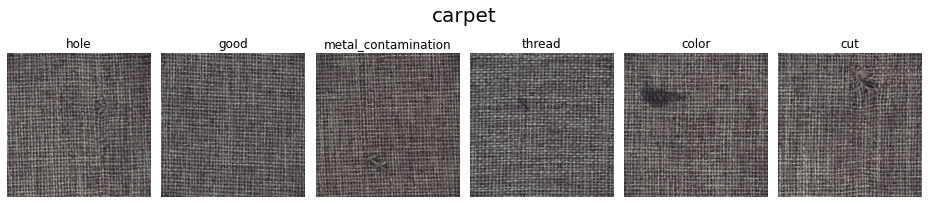

In [65]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'carpet'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

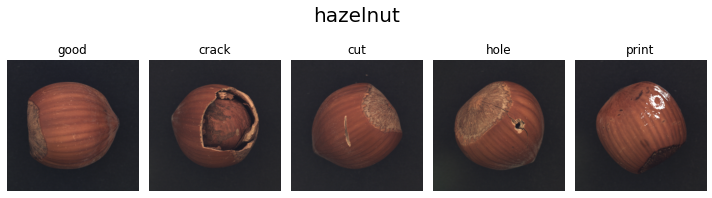

In [66]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,3))
ax = []
idx = 0

for i in range(5):
    ax.append(figure.add_subplot(1,5,i+1) )

c_name = 'hazelnut'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

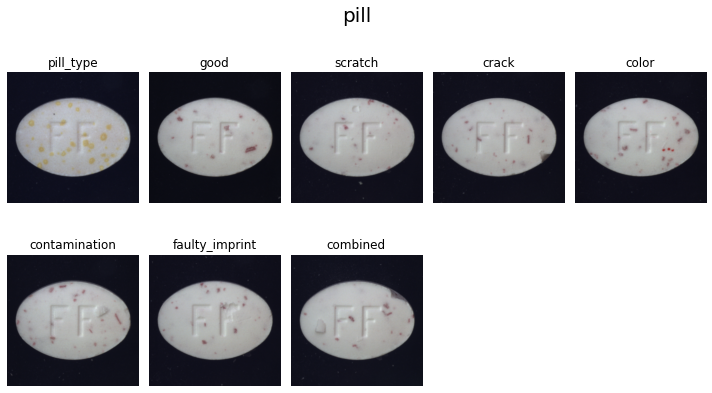

In [67]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,6))
ax = []
idx = 0

for i in range(8):
    ax.append(figure.add_subplot(2,5,i+1) )

c_name = 'pill'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

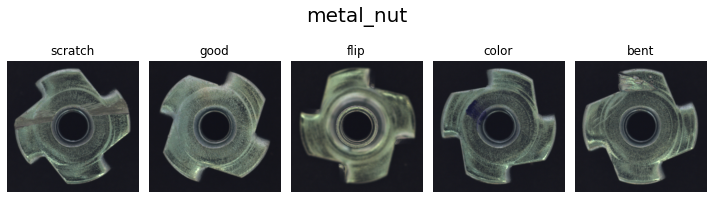

In [68]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,3))
ax = []
idx = 0

for i in range(5):
    ax.append(figure.add_subplot(1,5,i+1) )

c_name = 'metal_nut'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

(-0.5, 1023.5, 1023.5, -0.5)

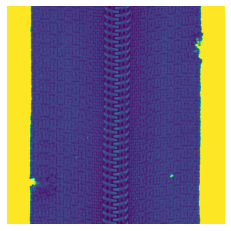

In [88]:
figure = plt.figure()

image = Image.open('./data/class_test/zipper/10020.png')
plt.imshow(image)
plt.axis('off')

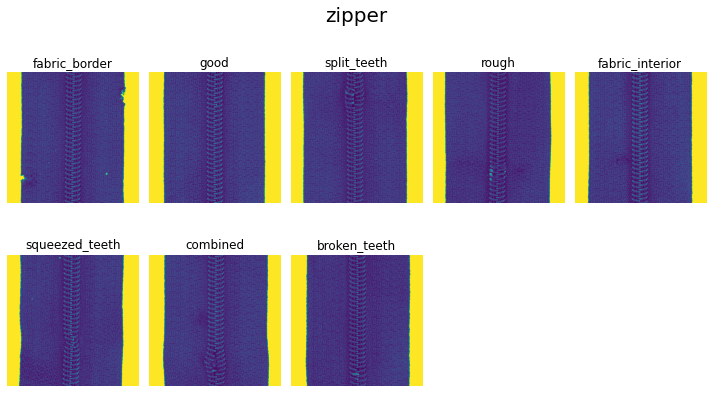

In [89]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(10,6))
ax = []
idx = 0

for i in range(8):
    ax.append(figure.add_subplot(2,5,i+1) )

c_name = 'zipper'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

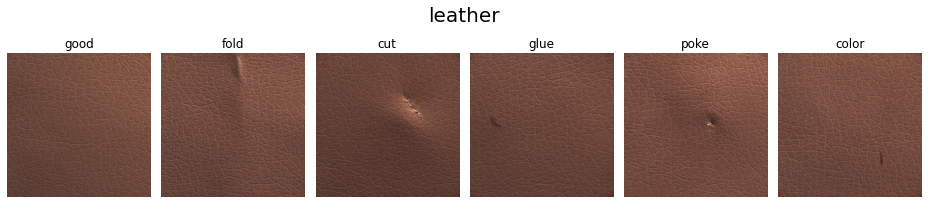

In [70]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'leather'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

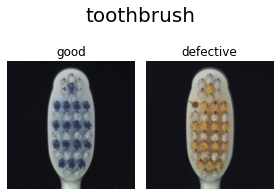

In [72]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(4,3))
ax = []
idx = 0

for i in range(2):
    ax.append(figure.add_subplot(1,2,i+1) )

c_name = 'toothbrush'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

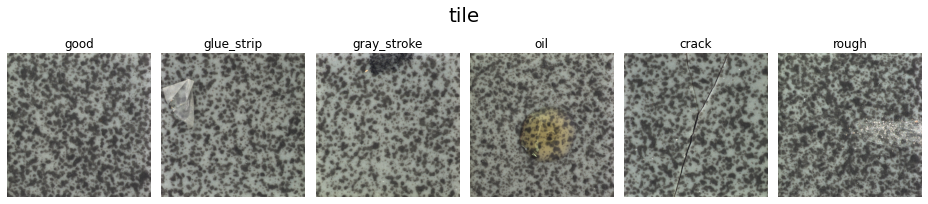

In [74]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'tile'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()

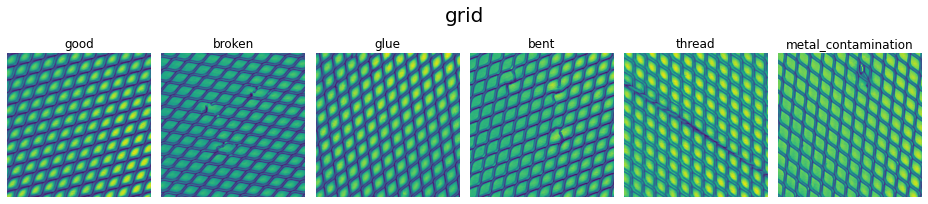

In [73]:
base_dir = './data/class_test'

figure = plt.figure(figsize=(13,3))
ax = []
idx = 0

for i in range(6):
    ax.append(figure.add_subplot(1,6,i+1) )

c_name = 'grid'
class_df = df_train[df_train['class']==c_name]
state_list = class_df['state'].unique()
plt.suptitle(c_name, fontsize=20)

for s_name in state_list: 
    s_file_name = class_df[class_df['state']==s_name]['file_name'].iloc[0]
    src = os.path.join(base_dir, c_name, s_file_name).replace('\\','/')
    image = Image.open(src)
    ax[idx].imshow(image)
    ax[idx].set_title(s_name)
    ax[idx].axis('off')
    idx += 1
    
plt.tight_layout()
plt.show()